# Libraries

In [1]:
import numpy as np # linear algebra and numericals
import pandas as pd # dataset manipulation
pd.set_option('display.max_columns', None)

# Visualization tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# modeling library
import sklearn

In [2]:
print('Numpy version: ', np.__version__)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Seaborn version: ', sns.__version__)
print('Sklearn version: ', sklearn.__version__)

Numpy version:  1.21.6
Pandas version:  1.3.5
Matplotlib version:  3.2.2
Seaborn version:  0.11.2
Sklearn version:  1.0.2


# Import Dataset

In [3]:
df = pd.read_csv("https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv", low_memory=False)

# overview
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
425149,425149,13006465,15038652,10000,10000,10000.0,36 months,14.64,344.90,C,C3,customer service mgt.,10+ years,OWN,39000.0,Verified,Mar-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,302xx,GA,19.75,0.0,Mar-00,2.0,62.0,NaN,9.0,0.0,4657,58.9,14.0,w,0.00,0.00,10471.56,10471.56,10000.00,471.56,0.0,0.00,0.0000,Jul-14,9436.86,NaN,Jul-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,6389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,NaN,NaN,NaN
62551,62551,8945410,10737508,9600,9600,9600.0,36 months,15.61,335.67,C,C3,CATERING,4 years,OWN,30000.0,Not Verified,Nov-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,201xx,VA,9.32,0.0,Nov-09,2.0,NaN,NaN,8.0,0.0,3379,45.1,9.0,f,0.00,0.00,5010.51,5010.51,2718.02,1309.21,0.0,983.28,176.9904,Nov-14,335.67,NaN,May-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,6202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,NaN
79703,79703,7697911,9399592,22000,22000,22000.0,36 months,7.62,685.55,A,A3,high school teacher,7 years,MORTGAGE,101000.0,Source Verified,Oct-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/05/13 > Currently I am ...,debt_consolidation,Debt consolidation,913xx,CA,8.52,0.0,Jan-73,0.0,29.0,NaN,9.0,0.0,11332,58.1,26.0,f,5985.76,5985.76,18500.85,18500.85,16014.24,2486.61,0.0,0.00,0.0000,Jan-16,685.55,Feb-16,Jan-16,0.0,75.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,333165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19500.0,NaN,NaN,NaN
310306,310306,26569454,29062465,27500,27500,27500.0,60 months,9.17,573.13,B,B1,Director,10+ years,MORTGAGE,100000.0,Source Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,496xx,MI,17.08,0.0,Jan-95,1.0,NaN,NaN,14.0,0.0,33139,38.6,37.0,w,21754.12,21754.12,8596.95,8596.95,5745.88,2851.07,0.0,0.00,0.0000,Dec-15,573.13,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,240898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85800.0,NaN,NaN,NaN
346985,346985,790817,995034,5000,5000,5000.0,36 months,14.49,172.09,C,C4,Certificated teacher,10+ years,MORTGAGE,100000.0,Source Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,923xx,CA,23.23,0.0,Dec-77,3.0,39.0,NaN,24.0,0.0,4591,50.5,57.0,f,2768.83,2768.83,3097.62,3097.62,2231.17,866.45,0.0,0.00,0.0000,Jan-16,172.09,Feb-16,Jan-16,0.0,39.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,459378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9100.0,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

1. The dataset consists of 466,285 rows and 75 columns
2. Some fields need a data type modification (term, emp_length, etc)
3. 17 fields are null fields (annual_inc_joint, dti_jont, etc)

## Missing Values

In [5]:
field_with_missing = [x for x in df.columns if df[x].isnull().sum() > 0]

for i in field_with_missing:
  missing_pct = np.round(df[i].isnull().sum()*100/len(df), 4)
  print(f'{i} : {missing_pct}% missing values')

emp_title : 5.9166% missing values
emp_length : 4.5054% missing values
annual_inc : 0.0009% missing values
desc : 72.9815% missing values
title : 0.0043% missing values
delinq_2yrs : 0.0062% missing values
earliest_cr_line : 0.0062% missing values
inq_last_6mths : 0.0062% missing values
mths_since_last_delinq : 53.6906% missing values
mths_since_last_record : 86.5666% missing values
open_acc : 0.0062% missing values
pub_rec : 0.0062% missing values
revol_util : 0.0729% missing values
total_acc : 0.0062% missing values
last_pymnt_d : 0.0806% missing values
next_pymnt_d : 48.7286% missing values
last_credit_pull_d : 0.009% missing values
collections_12_mths_ex_med : 0.0311% missing values
mths_since_last_major_derog : 78.7739% missing values
annual_inc_joint : 100.0% missing values
dti_joint : 100.0% missing values
verification_status_joint : 100.0% missing values
acc_now_delinq : 0.0062% missing values
tot_coll_amt : 15.0715% missing values
tot_cur_bal : 15.0715% missing values
open_acc

consider to drop fields with more than 50% missing values

## Duplicated Records

In [6]:
df.drop(columns = ['Unnamed: 0', 'id', 'member_id']).duplicated().sum()

0

There is no duplicated record

## Descriptive Statistics

In [7]:
# organize fields by data type
identifier = ['Unnamed: 0', 'id', 'member_id']
full_na = [x for x in df.columns if (df[x].isnull().sum()/len(df)) == 1]
encoded = ['policy_code']
categorical = [x for x in df.columns if df[x].dtypes == 'O' if x not in full_na]
numerical = [x for x in df.columns if x not in encoded+categorical+full_na+identifier]

### Numerical

In [8]:
df[numerical].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


Some fields have a significantly different mean-median, indicates outliers or skewed distribution

### Categorical

In [9]:
df[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [10]:
df[encoded].value_counts()

policy_code
1              466285
dtype: int64

1. Some categorical fields have many unique values
2. Some other categorical fields have only 1 unique

## Univariate Analysis

### Numerical

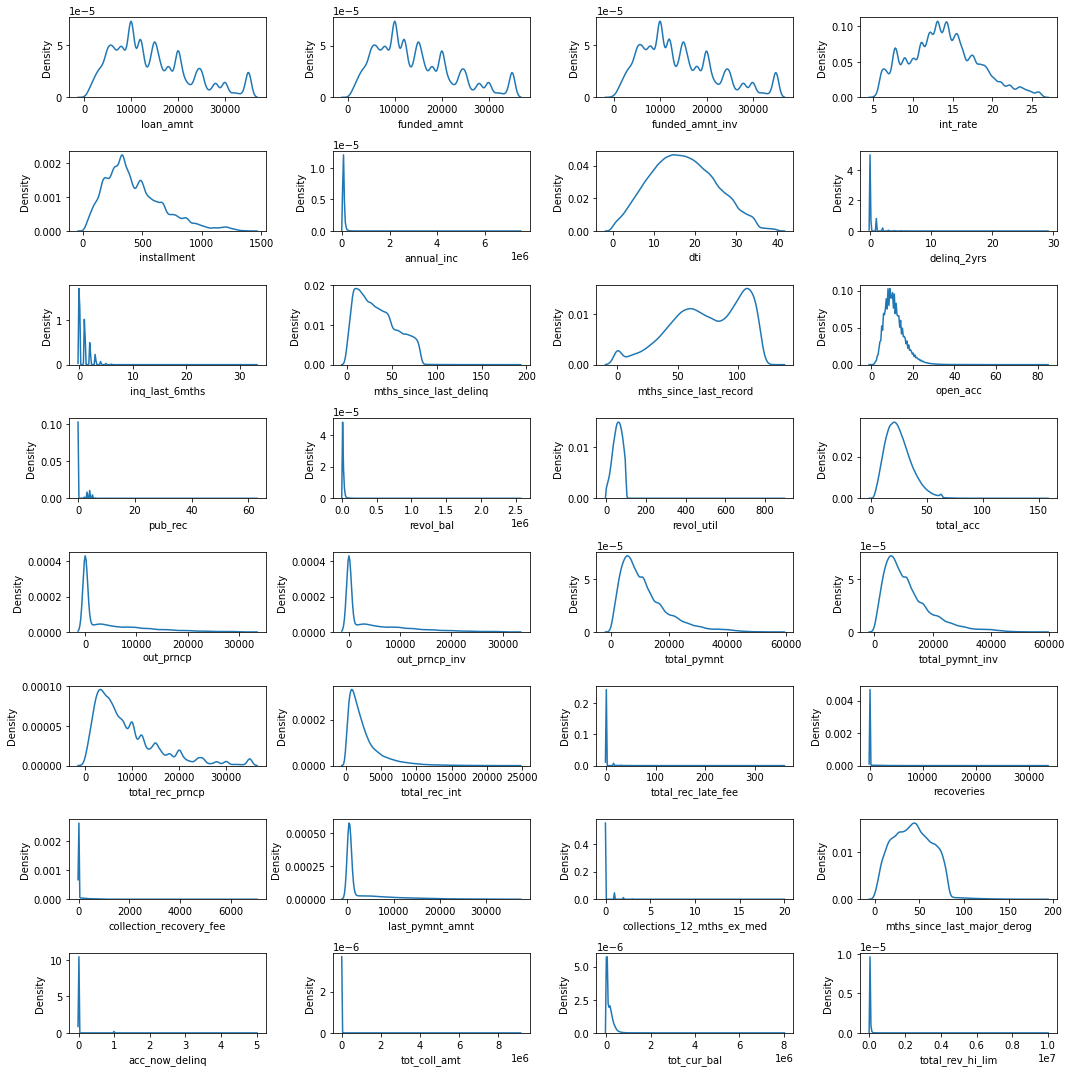

In [11]:
# KDE Plot

plt.figure(figsize = (15, 15))
for i in range(len(numerical)):
  plt.subplot(8, 4, i + 1)
  sns.kdeplot(data = df, x = numerical[i])

plt.tight_layout()
plt.show()

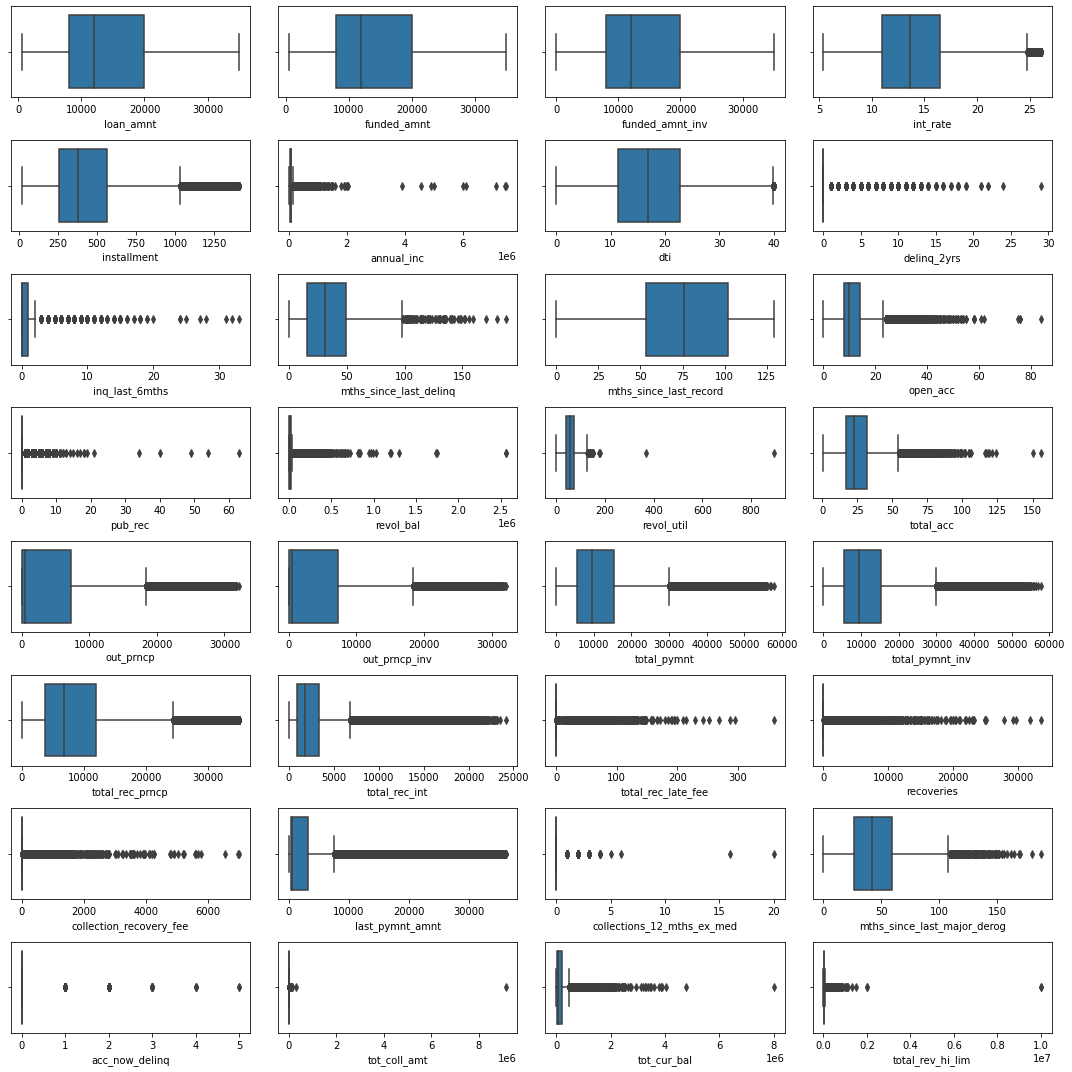

In [12]:
# Box Plot

plt.figure(figsize = (15, 15))
for i in range(len(numerical)):
  plt.subplot(8, 4, i + 1)
  sns.boxplot(data = df, x = numerical[i])

plt.tight_layout()
plt.show()

Many numerical fields contain outliers or not normally distributed. consider to :

1. Drop or replace oulier
2. Transform to normalize
3. Use non linear model

### Categorical

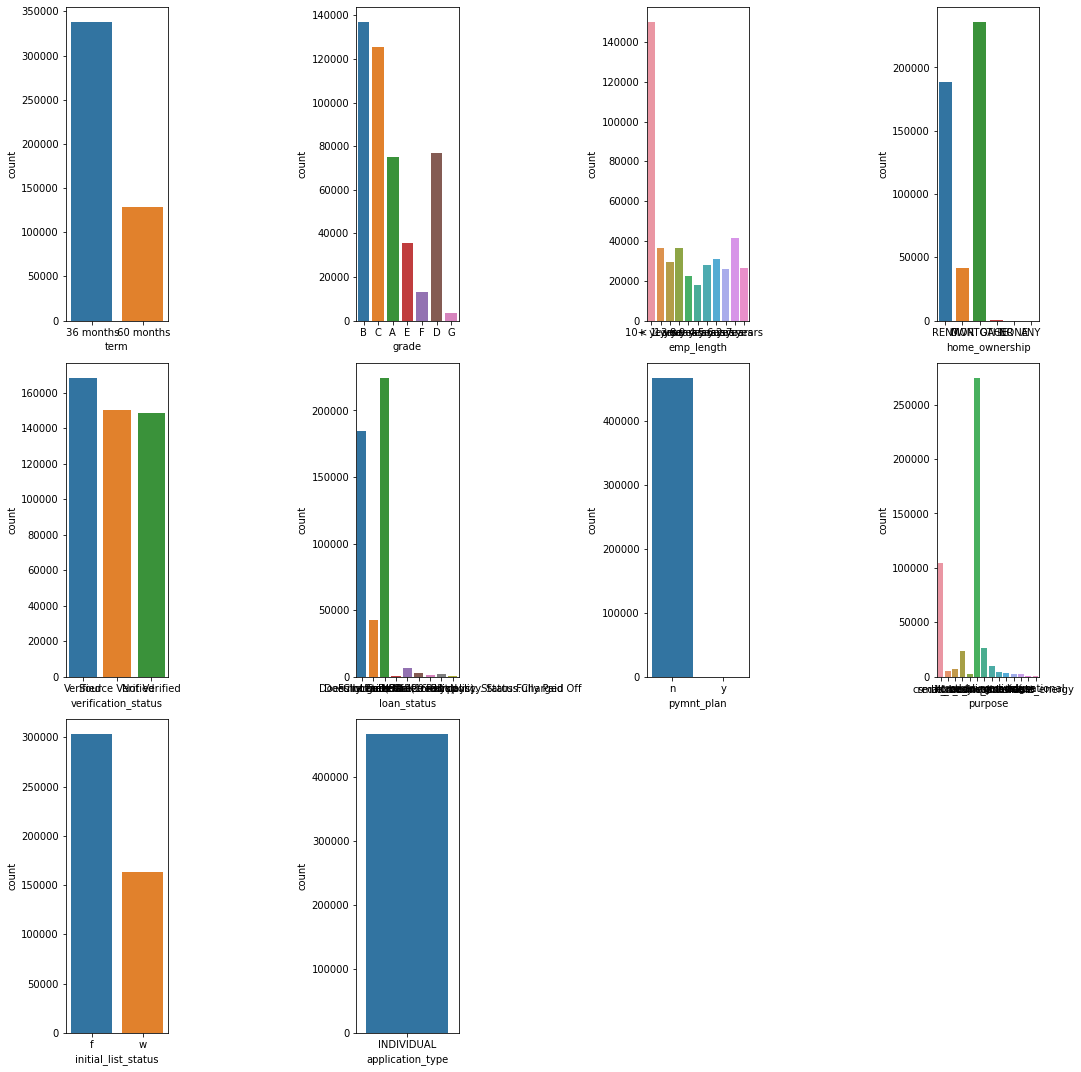

In [13]:
# Count plot

cat_to_plot = [x for x in categorical if df[x].nunique() <= 20]

plt.figure(figsize = (15, 15))
for i in range(len(cat_to_plot)):
  plt.subplot(3, 4, i+1)
  sns.countplot(data = df, x = cat_to_plot[i])

plt.tight_layout()
plt.show()

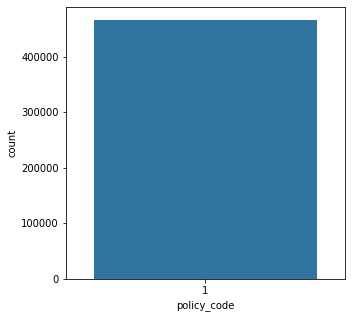

In [14]:
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'policy_code')
plt.show()

Some categorical fields dominated by only 1 unique value

## Bicariate Analysis

### Numerical

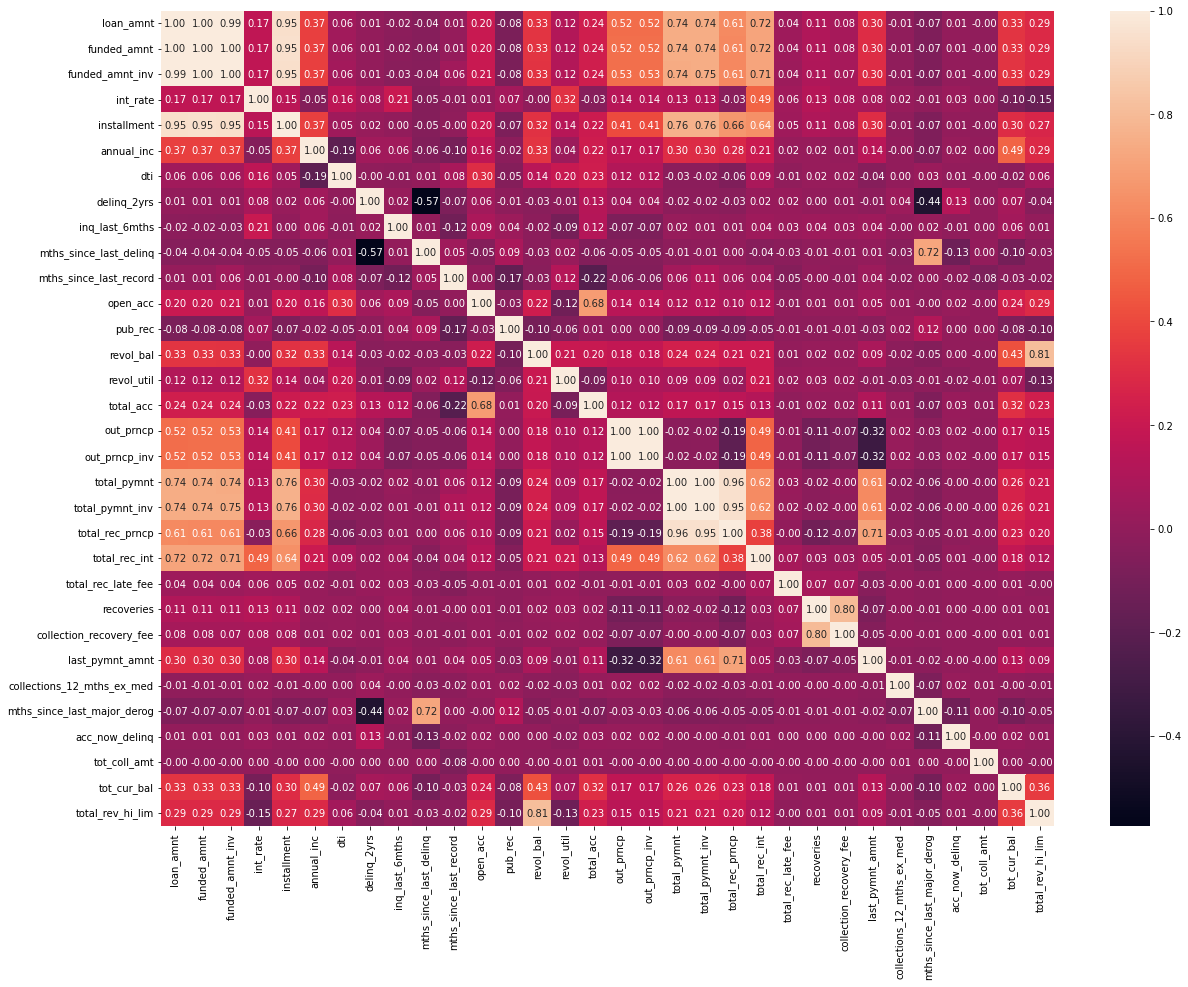

In [15]:
# correlation heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df[numerical].corr(), annot = True, fmt = '.2f')
plt.show()

Many fields have a high correlation with other fields, drop them

# Preprocessing

In [16]:
df_prep = df.copy()

## Useless Features

In [17]:
# drop useless features
df_prep = df_prep.drop(columns = full_na + identifier + ['desc', 'url', 'title', 'zip_code', 'addr_state', 
                                                         'emp_title', 'sub_grade', 'pymnt_plan', 'application_type',
                                                         'policy_code'])

In [18]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

## Feature Extraction

### Define Target Values

In [19]:
# Check target values
df_prep['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [20]:
# Categorize target values into bad loan and good loan
bad_loan = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off',
            'Late (31-120 days)']

df_prep['loan_status'] = df_prep['loan_status'].apply(lambda x : 0 if x in bad_loan else 1)

df_prep['loan_status'].unique()

array([1, 0])

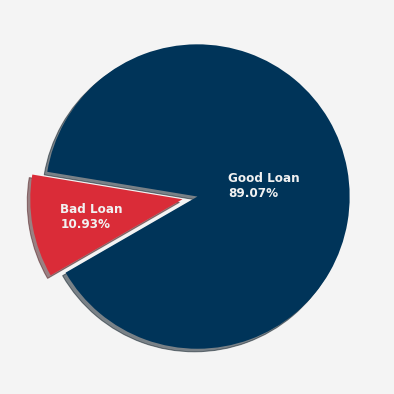

In [21]:
# Visualize target proportion

fig, ax = plt.subplots(figsize = (7,7))
ax.pie(df_prep['loan_status'].value_counts(), startangle = -150,
       explode = [0, .1], shadow = True, colors = ['#003459', '#da2c38'])
fig.set(facecolor = '#f4f4f4')

text1 = 'Good Loan\n89.07%'
text2 = 'Bad Loan\n10.93%'

plt.text(.2, 0, s = text1,
         fontsize = 12, weight = 600,
         color = '#f1f1f1')

plt.text(-0.9, -0.2, s = text2,
         fontsize = 12, weight = 600,
         color = '#f1f1f1')

ax.set(frame_on = False)
plt.show()

### Term

In [22]:
# Check term values
df_prep['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
# Take just the number values for 'term'
df_prep['term'] = df_prep['term'].apply(lambda x: int(x.split(' ')[1]))

df_prep['term'].unique()

array([36, 60])

### emp_length

In [24]:
df_prep['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [25]:
# Extract the numbe values for emp_length

def emp_len_extract(x):
  if str(x) == 'nan':
    return x
  elif str(x) == '< 1 year':
    return int(0)
  elif str(x) == '10+ years':
    return int(10)
  else:
    return int(x.split(' ')[0])

df_prep['emp_length'] = df_prep['emp_length'].apply(lambda x: emp_len_extract(x))

In [26]:
df_prep['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### earliest_cr_line

In [27]:
df_prep['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

We will use 12-12-2017 as latest date recorded

In [28]:
## Convert to datetime
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format = '%b-%y')
df_prep['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [29]:
# Check min and max date

print('Min: ', df_prep['earliest_cr_line'].min())
print('Max: ', df_prep['earliest_cr_line'].max())

Min:  1969-01-01 00:00:00
Max:  2068-12-01 00:00:00


Year 1968 recognized as 2068, we need to fix it

In [30]:
## Fix error years
df_prep['earliest_cr_line'] = df_prep['earliest_cr_line'].apply(lambda x: x if x.year <= 2017 else x.replace(year = x.year-100))
df_prep['earliest_cr_line'].max()

Timestamp('2011-11-01 00:00:00')

next step is extract a feature mths_since_earliest_cr_line

In [31]:
df_prep['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['earliest_cr_line'])/np.timedelta64(1, 'M')))
df_prep['mths_since_earliest_cr_line'].sample(5)

316493    158.0
465226    325.0
215979    158.0
135880    348.0
156066    140.0
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
# drop feature earliest_cr_line
df_prep = df_prep.drop(columns = 'earliest_cr_line')

### issue_d

In [33]:
df_prep['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [34]:
# Convert to datetime
df_prep['issue_d'] = pd.to_datetime(df_prep['issue_d'], format = '%b-%y')
df_prep['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [35]:
# check min and max date
print('Min: ', df_prep['issue_d'].min())
print('Max: ', df_prep['issue_d'].max())

Min:  2007-06-01 00:00:00
Max:  2014-12-01 00:00:00


In [36]:
# extract new feature mths_since_issue_d
df_prep['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['issue_d'])/np.timedelta64(1, 'M')))
df_prep['mths_since_issue_d'].sample(5)

265844    38.0
67417     49.0
11521     77.0
266233    37.0
72779     50.0
Name: mths_since_issue_d, dtype: float64

In [37]:
# drop feature issue_d
df_prep = df_prep.drop(columns = 'issue_d')

### last_credit_pull_d

In [38]:
df_prep['last_credit_pull_d'].head()

0    Jan-16
1    Sep-13
2    Jan-16
3    Jan-15
4    Jan-16
Name: last_credit_pull_d, dtype: object

In [39]:
# Convert to datetime
df_prep['last_credit_pull_d'] = pd.to_datetime(df_prep['last_credit_pull_d'], format = '%b-%y')
df_prep['last_credit_pull_d'].head()

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [40]:
# check min and max date
print('Min: ', df_prep['last_credit_pull_d'].min())
print('Max: ', df_prep['last_credit_pull_d'].max())

Min:  2007-05-01 00:00:00
Max:  2016-01-01 00:00:00


In [41]:
# extract new feature mths_since_issue_d
df_prep['mths_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['last_credit_pull_d'])/np.timedelta64(1, 'M')))
df_prep['mths_last_credit_pull_d'].sample(5)

408210    23.0
2773      37.0
303137    23.0
409813    23.0
6226      24.0
Name: mths_last_credit_pull_d, dtype: float64

In [42]:
#drop feature last_credit_pull_d
df_prep = df_prep.drop(columns = 'last_credit_pull_d')

### last_pymnt_d

In [43]:
df_prep['last_pymnt_d'].head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    Jan-16
Name: last_pymnt_d, dtype: object

In [44]:
# Convert to datetime
df_prep['last_pymnt_d'] = pd.to_datetime(df_prep['last_pymnt_d'], format = '%b-%y')
df_prep['last_pymnt_d'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [45]:
# check min and max date
print('Min: ', df_prep['last_pymnt_d'].min())
print('Max: ', df_prep['last_pymnt_d'].max())

Min:  2007-12-01 00:00:00
Max:  2016-01-01 00:00:00


In [46]:
# extract new feature mths_since_last_pymnt_d
df_prep['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['last_pymnt_d'])/np.timedelta64(1, 'M')))
df_prep['mths_since_last_pymnt_d'].sample(5)

396050    23.0
202719    44.0
188910    25.0
75372     31.0
406420    23.0
Name: mths_since_last_pymnt_d, dtype: float64

In [47]:
# drop feature last_pymnt_d
df_prep = df_prep.drop(columns = 'last_pymnt_d')

### next_pymnt_d

In [48]:
df_prep['next_pymnt_d'].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    Feb-16
Name: next_pymnt_d, dtype: object

In [49]:
# Convert to datetime
df_prep['next_pymnt_d'] = pd.to_datetime(df_prep['next_pymnt_d'], format = '%b-%y')
df_prep['next_pymnt_d'].head()

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-02-01
Name: next_pymnt_d, dtype: datetime64[ns]

In [50]:
# check min and max date
print('Min: ', df_prep['next_pymnt_d'].min())
print('Max: ', df_prep['next_pymnt_d'].max())

Min:  2007-12-01 00:00:00
Max:  2016-03-01 00:00:00


In [51]:
# extract new feature mths_since_next_pymnt_d
df_prep['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['next_pymnt_d'])/np.timedelta64(1, 'M')))
df_prep['mths_since_next_pymnt_d'].sample(5)

340698    22.0
160500     NaN
96510      NaN
396728    22.0
403738     NaN
Name: mths_since_next_pymnt_d, dtype: float64

In [52]:
# drop feature next_pymnt_d
df_prep = df_prep.drop(columns = 'next_pymnt_d')

## Handle Missing Values

In [53]:
# Recheck Missing Values

feats_with_missing = [x for x in df_prep.columns if df_prep[x].isnull().sum() > 0]

for i in feats_with_missing:
  missing_pct = np.round(df_prep[i].isnull().sum()*100/len(df_prep),4)

  print(f'{i} : {missing_pct}% Missing Values')

emp_length : 4.5054% Missing Values
annual_inc : 0.0009% Missing Values
delinq_2yrs : 0.0062% Missing Values
inq_last_6mths : 0.0062% Missing Values
mths_since_last_delinq : 53.6906% Missing Values
mths_since_last_record : 86.5666% Missing Values
open_acc : 0.0062% Missing Values
pub_rec : 0.0062% Missing Values
revol_util : 0.0729% Missing Values
total_acc : 0.0062% Missing Values
collections_12_mths_ex_med : 0.0311% Missing Values
mths_since_last_major_derog : 78.7739% Missing Values
acc_now_delinq : 0.0062% Missing Values
tot_coll_amt : 15.0715% Missing Values
tot_cur_bal : 15.0715% Missing Values
total_rev_hi_lim : 15.0715% Missing Values
mths_since_earliest_cr_line : 0.0062% Missing Values
mths_last_credit_pull_d : 0.009% Missing Values
mths_since_last_pymnt_d : 0.0806% Missing Values
mths_since_next_pymnt_d : 48.7286% Missing Values


In [54]:
# drop features with more than 40% missing values
many_missing = [x for x in df_prep.columns if (df_prep[x].isnull().sum()/len(df_prep)) > 0.4]
df_prep = df_prep.drop(columns = many_missing)

In [55]:
# Fill missing values with median, mode, or 0
df_prep['emp_length'].fillna(df_prep['emp_length'].median(), inplace = True)
df_prep['annual_inc'].fillna(df_prep['annual_inc'].median(), inplace = True)
df_prep['delinq_2yrs'].fillna(0, inplace = True)
df_prep['inq_last_6mths'].fillna(0, inplace = True)
df_prep['open_acc'].fillna(0, inplace = True)
df_prep['pub_rec'].fillna(0, inplace = True)
df_prep['revol_util'].fillna(0, inplace = True)
df_prep['total_acc'].fillna(0, inplace = True)
df_prep['collections_12_mths_ex_med'].fillna(0, inplace = True)
df_prep['acc_now_delinq'].fillna(0, inplace = True)
df_prep['tot_coll_amt'].fillna(0, inplace = True)
df_prep['tot_coll_amt'].fillna(0, inplace = True)
df_prep['tot_cur_bal'].fillna(0, inplace = True)
df_prep['total_rev_hi_lim'].fillna(0, inplace = True)
df_prep['mths_since_earliest_cr_line'].fillna(0, inplace = True)
df_prep['mths_last_credit_pull_d'].fillna(0, inplace = True)
df_prep['mths_since_last_pymnt_d'].fillna(0, inplace = True)

In [56]:
# Check missing
df_prep.isnull().sum().sum()

0

## Feature Encoding

In [57]:
categorical = [x for x in df_prep.columns if df_prep[x].dtypes == 'O']
categorical

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [58]:
def woe_encoding(feature):
  df_woe = df_prep.groupby(feature)['loan_status'].mean()
  df_woe = pd.DataFrame(df_woe)
  df_woe = df_woe.rename(columns = {'loan_status' : 'Good'})

  df_woe['Bad'] = 1 - df_woe['Good']
  df_woe['Bad'] = np.where(df_woe['Bad'] == 0, 0.000001, df_woe['Bad'])

  df_woe['WoE'] = np.log(df_woe['Good']/df_woe['Bad'])
  df_woe = df_woe.reset_index()

  dict_woe = {}

  for i in range(len(df_woe)):
    dict_woe.update({df_woe[feature][i] : df_woe['WoE'][i]})

  print(feature)
  print(dict_woe)
  print('=============')

  df_prep[feature] = df_prep[feature].map(dict_woe)

In [59]:
# Encoding
for i in categorical:
  woe_encoding(i)

grade
{'A': 3.2125736467325, 'B': 2.4618875903278776, 'C': 2.0425935675272, 'D': 1.7028433882740577, 'E': 1.4193782801376138, 'F': 1.1456305852441009, 'G': 0.9536782639457755}
home_ownership
{'ANY': 13.815510557964274, 'MORTGAGE': 2.24267659058628, 'NONE': 1.6582280766035322, 'OTHER': 1.3322271398496146, 'OWN': 2.1086078317578734, 'RENT': 1.9358640024933094}
verification_status
{'Not Verified': 2.2648163583373933, 'Source Verified': 2.1522817762089925, 'Verified': 1.9244242558265505}
purpose
{'car': 2.324383200580164, 'credit_card': 2.360616574485413, 'debt_consolidation': 2.0573692899756306, 'educational': 1.3338041784984938, 'home_improvement': 2.2177838003224553, 'house': 1.814045957842934, 'major_purchase': 2.247754357033412, 'medical': 1.8672965372392198, 'moving': 1.7140541687050777, 'other': 1.8320796553918501, 'renewable_energy': 1.7047480922384253, 'small_business': 1.2906536574322063, 'vacation': 2.013309031818108, 'wedding': 1.9770007361253439}
initial_list_status
{'f': 1.98

In [60]:
df_prep[categorical].sample(5)

,grade,home_ownership,verification_status,purpose,initial_list_status
7337,2.461888,1.935864,2.152282,2.057369,1.989514
359550,2.042594,2.242677,2.152282,2.057369,1.989514
164970,3.212574,1.935864,2.264816,2.057369,1.989514
459529,2.042594,1.935864,2.152282,2.057369,2.327261
248707,1.702843,2.242677,1.924424,2.057369,1.989514


## Feature Selection

### Correlation Checking

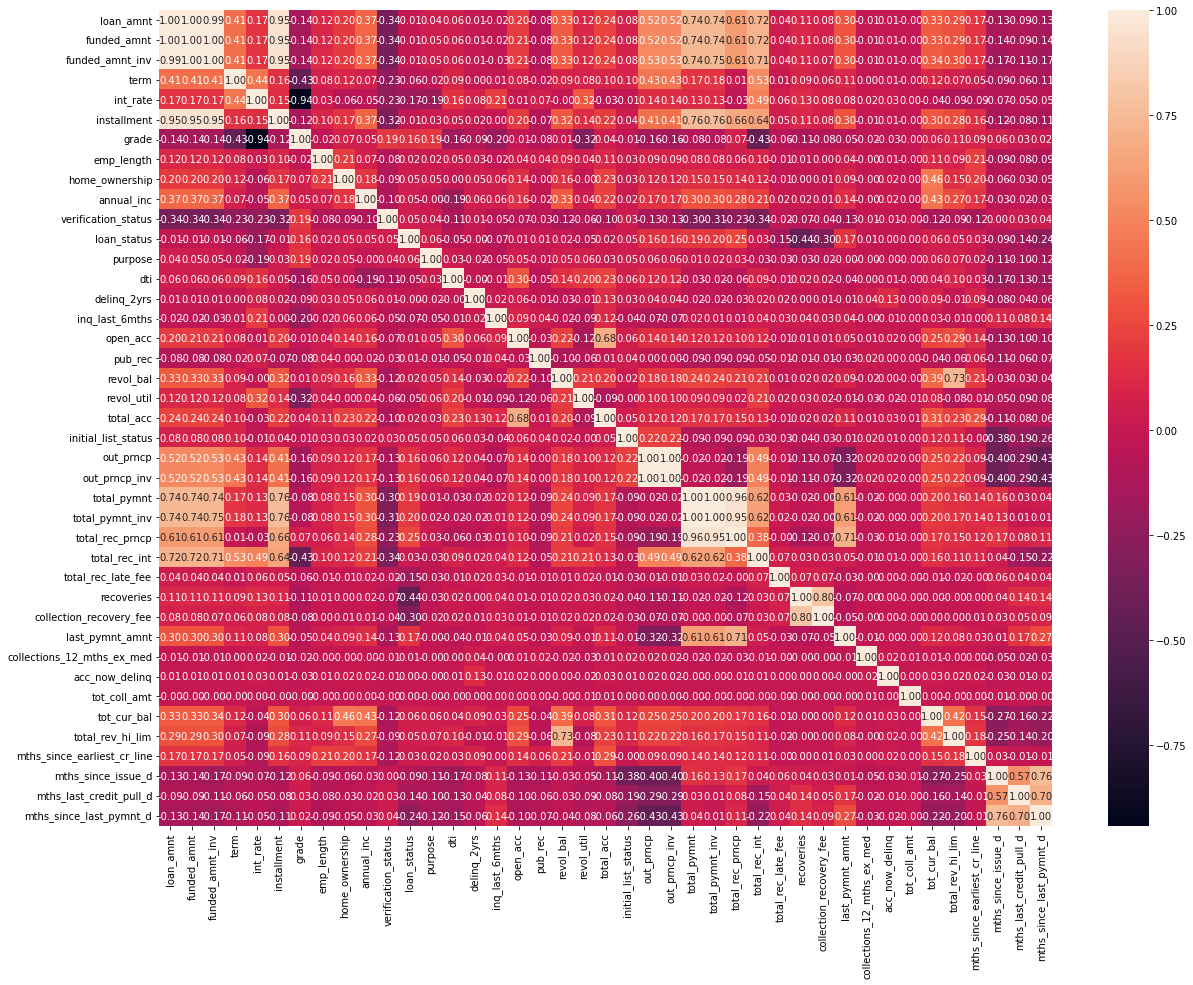

In [61]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_prep.corr(), annot = True, fmt = '.2f')
plt.show()

We will drop high correlated fetures respects to informational value

### Informational Value Checking

In [62]:
def generate_iv(feature):
  df_iv = df_prep.copy()
  if (df_iv[feature].nunique() > 20) & (df_iv[feature].dtypes != 'O'):
    # binning
    min = df_iv[feature].min()
    max = df_iv[feature].max() + 0.00001
    bin_range = (max-min)/10

    bin_dict = {}

    for i in range(10):
      bin_dict.update({'min_bin_'+str(i) : min + i * bin_range})
      bin_dict.update({'max_bin_'+str(i) : min + (i+1) * bin_range})

    def binning(x):
      if (x >= bin_dict['min_bin_0']) & (x < bin_dict['max_bin_0']):
        return 'bin_0'
      elif (x >= bin_dict['min_bin_1']) & (x < bin_dict['max_bin_1']):
        return 'bin_1'
      elif (x >= bin_dict['min_bin_2']) & (x < bin_dict['max_bin_2']):
        return 'bin_2'
      elif (x >= bin_dict['min_bin_3']) & (x < bin_dict['max_bin_3']):
        return 'bin_3'
      elif (x >= bin_dict['min_bin_4']) & (x < bin_dict['max_bin_4']):
        return 'bin_4'
      elif (x >= bin_dict['min_bin_5']) & (x < bin_dict['max_bin_5']):
        return 'bin_5'
      elif (x >= bin_dict['min_bin_6']) & (x < bin_dict['max_bin_6']):
        return 'bin_6'
      elif (x >= bin_dict['min_bin_7']) & (x < bin_dict['max_bin_7']):
        return 'bin_7'
      elif (x >= bin_dict['min_bin_8']) & (x < bin_dict['max_bin_8']):
        return 'bin_8'
      elif (x >= bin_dict['min_bin_9']) & (x < bin_dict['max_bin_9']):
        return 'bin_9'

    df_iv[feature] = df_iv[feature].apply(lambda x: binning(x))

  df_woe = df_iv.groupby(feature)['loan_status'].mean()
  df_woe = pd.DataFrame(df_woe)
  df_woe = df_woe.rename(columns = {'loan_status' : 'Good'})

  df_woe['Bad'] = 1 - df_woe['Good']
  df_woe['Bad'] = np.where(df_woe['Bad'] == 0, 0.00001, df_woe['Bad'])

  df_woe['Good'] = np.where(df_woe['Good'] == 0, 0.00001, df_woe['Good'])

  df_woe['diff'] = df_woe['Good'] - df_woe['Bad']

  df_woe['WoE'] = np.log(df_woe['Good']/df_woe['Bad'])
  
  woe = df_woe['WoE'].sum()
  sum_diff = df_woe['diff'].sum()

  iv = sum_diff * woe

  print(f'{feature} : {iv}')

In [63]:
for i in df_prep.columns.to_list():
  generate_iv(i)

loan_amnt : 161.481274489819
funded_amnt : 161.65784722900966
funded_amnt_inv : 161.181659814685
term : 6.141634081541554
int_rate : 152.01748458666543
installment : 153.72519724288196
grade : 62.0959231265295
emp_length : 194.55285193561804
home_ownership : 95.67197778739067
annual_inc : 565.5500943798377
verification_status : 14.895395407576942
loan_status : 0.0
purpose : 274.79572005352355
dti : 161.7392369650754
delinq_2yrs : 289.6805709972397
inq_last_6mths : 13.958616201984096
open_acc : 349.88595850065474
pub_rec : 737.1184309536396
revol_bal : 249.02914332808805
revol_util : 173.49199731089894
total_acc : 289.4977302788577
initial_list_status : 6.827424808840537
out_prncp : 261.84711946559304
out_prncp_inv : 261.75804440363373
total_pymnt : 396.07943629912694
total_pymnt_inv : 442.29284599572213
total_rec_prncp : 350.5137033868898
total_rec_int : 195.9814836129295
total_rec_late_fee : 19.50916806686901
recoveries : 832.6394110955138
collection_recovery_fee : 833.4624246471941
l

In [64]:
# drop high correlated features with lower information value

feat_drop = ['loan_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'funded_amnt', 
             'grade', 'total_acc', 'total_rev_hi_lim', 'total_rec_prncp', 'recoveries',
             'mths_since_last_pymnt_d']
df_prep = df_prep.drop(columns = feat_drop)

## Feature Transformation

In [65]:
# split into train and test set
from sklearn.model_selection import train_test_split
X = df_prep.drop(columns = 'loan_status')
y = df_prep['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
feats = X_train.columns.to_list()

In [66]:
# Yeo Johnson Transformation
from sklearn.preprocessing import PowerTransformer

feat_to_transform = [x for x in feats if x not in categorical]

pt = PowerTransformer()
pt.fit(X_train[feat_to_transform])

X_train_trans = pt.transform(X_train[feat_to_transform])
X_test_trans = pt.transform(X_test[feat_to_transform])

X_train_trans = pd.DataFrame(X_train_trans, columns = feat_to_transform)
X_test_trans = pd.DataFrame(X_test_trans, columns = feat_to_transform)

X_train = X_train.drop(columns = feat_to_transform)
X_train = pd.concat([X_train_trans, X_train], axis = 1)

X_test = X_test.drop(columns = feat_to_transform)
X_test = pd.concat([X_test_trans, X_test], axis = 1)

In [67]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns = feats)
X_test = pd.DataFrame(X_test, columns = feats)

## Imbalance Handling

In [68]:
y_train.value_counts(normalize = True)

1    0.89092
0    0.10908
Name: loan_status, dtype: float64

In [69]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE(sampling_strategy=.5).fit_resample(X_train, y_train)

X_train = X_resample
y_train = y_resample

# Modeling

## Functions

In [70]:
## Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, train_feats, test_feats, pos_label = 0, cv = True):
  y_pred_train = model.predict(train_feats)
  y_pred_train_proba = model.predict_proba(train_feats)

  y_pred_test = model.predict(test_feats)
  y_pred_test_proba = model.predict_proba(test_feats)

  print('Accuracy Train: ', np.round(accuracy_score(y_train, y_pred_train),2))
  print('Accuracy Test: ', np.round(accuracy_score(y_test, y_pred_test),2))
  print('=========================')
  print('Precision Train: ', np.round(precision_score(y_train, y_pred_train, pos_label = pos_label),2))
  print('Precision Test: ', np.round(precision_score(y_test, y_pred_test, pos_label = pos_label),2))
  print('=========================')
  print('Recall Train: ', np.round(recall_score(y_train, y_pred_train, pos_label = pos_label),2))
  print('Recall Test: ', np.round(recall_score(y_test, y_pred_test, pos_label = pos_label),2))
  print('=========================')
  print('f1 Train: ', np.round(f1_score(y_train, y_pred_train, pos_label = pos_label),2))
  print('f1 Test: ', np.round(f1_score(y_test, y_pred_test, pos_label = pos_label),2))
  print('=========================')
  print('AUC Train: ', np.round(roc_auc_score(y_train, y_pred_train_proba[:, 1]),2))
  print('AUC Test: ', np.round(roc_auc_score(y_test, y_pred_test_proba[:, 1]),2))

# Draw Confusion Matrix
def draw_cm(model, feats, target, test = True):
  y_pred = model.predict(feats)
  cm = confusion_matrix(target, y_pred)

  group_counts = ["{0:0.0f}".format(value) for value in 
                  cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in 
                       cm.flatten()/np.sum(cm)]

  annots = [f'{v1}\n \n{v2}' for v1, v2 in 
            zip(group_counts,group_percentages)]
  annots = np.asarray(annots).reshape(2,2)
  
  labels = ['Bad Loan', 'Good Loan']

  sns.heatmap(cm, annot = annots, fmt = '', cbar = False,
              yticklabels = labels, xticklabels = labels,
              cmap = 'Greens_r')
  
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

  plt.show()

## Logistic Regression

### Base Training

In [71]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [72]:
# Evaluate
evaluate_model(lr, X_train, X_test)

Accuracy Train:  0.94
Accuracy Test:  0.97
Precision Train:  0.97
Precision Test:  0.89
Recall Train:  0.84
Recall Test:  0.84
f1 Train:  0.9
f1 Test:  0.87
AUC Train:  0.96
AUC Test:  0.96


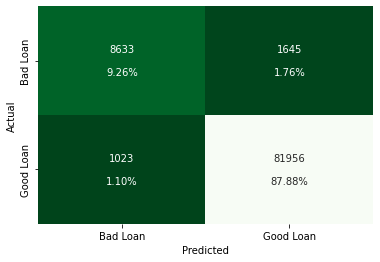

In [73]:
# Confusion Matrix (Test)
draw_cm(lr, X_test, y_test)

In [74]:
coefs = lr.coef_.tolist()[0]

df_imp = pd.DataFrame()
df_imp['Feature'] = feats
df_imp['Coef'] = coefs
df_imp['Abs_Coef'] = abs(df_imp['Coef'])
df_imp = df_imp.sort_values('Abs_Coef', ascending = False).reset_index(drop = True)
df_imp

,Feature,Coef,Abs_Coef
0,initial_list_status,-45.283914,45.283914
1,revol_util,40.079721,40.079721
2,tot_coll_amt,35.067138,35.067138
3,out_prncp_inv,-23.418521,23.418521
4,tot_cur_bal,6.437708,6.437708
5,int_rate,4.807572,4.807572
6,term,2.753990,2.753990
7,pub_rec,2.424949,2.424949
8,total_pymnt_inv,2.246967,2.246967
9,revol_bal,2.243373,2.243373


### Reduce Features

Use only top 14 important features and see the model performance

In [75]:
# Define train and test set
feat_simpl = df_imp['Feature'][:14].tolist()
X_train_simpl = X_train[feat_simpl]
X_test_simpl = X_test[feat_simpl]

In [76]:
# Train Model

lr_simpl = LogisticRegression(max_iter = 500)
lr_simpl.fit(X_train_simpl, y_train)

LogisticRegression(max_iter=500)

In [77]:
# evaluate
evaluate_model(lr_simpl, X_train_simpl, X_test_simpl)

Accuracy Train:  0.94
Accuracy Test:  0.97
Precision Train:  0.97
Precision Test:  0.89
Recall Train:  0.84
Recall Test:  0.84
f1 Train:  0.9
f1 Test:  0.87
AUC Train:  0.96
AUC Test:  0.96


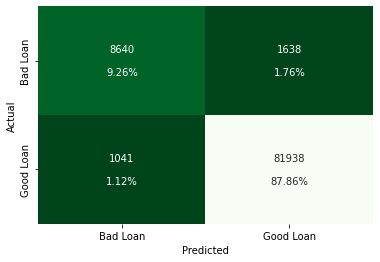

In [78]:
# Confusion matrix 
draw_cm(lr_simpl, X_test_simpl, y_test)

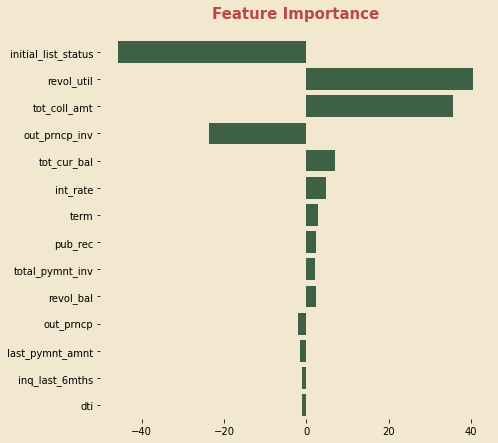

In [79]:
# draw feature importance
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = lr_simpl.coef_.tolist()[0], y = feat_simpl,color = '#386641',
            ax = ax)

plt.title('Feature Importance', color = '#bc4749', weight = 600,
          fontsize = 15, pad = 20)

fig.set(facecolor = '#f2e8cf')
ax.set(frame_on = False)
plt.show()

**Interpretation of Feature Imprtance**

1. The loan with initial list status 'Whole (w)' more likely to be a bad loan.
2. The loan with higher revolving utilities amount more likely to be a good loan.
3. The loan with higher total collected amount more likely to be a good loan.
4. The loan with higher outstanding principal amount more likely to be a bad loan.